RandomForestRegressor: errors
mean_absolute_error= 19857.201917808216
mean_squared_error= 1213372557.266767
sqrt_mean_squared_error= 34833.497631830876
target.max= 755000
target.min= 34900
target.mean= 180921.19589041095
Features:
OverallQual 0.522076103177035
GrLivArea 0.10849472606592389
BsmtFinSF1 0.05062171571539924
GarageCars 0.049338530661230715
TotalBsmtSF 0.03445528727652172
2ndFlrSF 0.025116322625850236
1stFlrSF 0.02198812539204082
LotArea 0.015760838939924138
GarageArea 0.01569921447573302
MasVnrArea 0.012450754740418053
YearBuilt 0.012371711678754609
ExterQual_Ex 0.008085670439214238
OpenPorchSF 0.007493743645329678
LotFrontage 0.007490764756021613
Fireplaces 0.007331317670038581
MoSold 0.006460107081098977
WoodDeckSF 0.006200039260365807
ScreenPorch 0.006049290851363707
Id 0.005424499786562146
YearRemodAdd 0.00519841108480004
BsmtUnfSF 0.005161609884367689
OverallCond 0.003504840019536365
TotRmsAbvGrd 0.0031688111958544803
CentralAir_Y 0.0028928109387332803
GarageYrBlt 0.00

C:\Users\user\Anaconda3\lib\site-packages\pandas\core\indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


using Regressions, get errors
LogisticRegression absolute error: 39720.17808219178
LinearRegression absolute error: 22587.998732688582
DecisionTreeRegressor absolute error: 26363.43493150685


C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


         log_r          lin_r      tr_r
0     139000.0  121064.021752  108000.0
1     215000.0  230301.841686  180000.0
2     250000.0  274136.494106  285000.0
3     140000.0  132247.406048   90000.0
4     239000.0  168751.594434  129500.0
5     140000.0  180572.302539  135000.0
6     147000.0  155829.170944  124000.0
7     239000.0  148018.934096  173000.0
8     250000.0  211905.654876  192500.0
9     250000.0  232673.564659  272000.0
10    110000.0  134693.104532  175000.0
11    112000.0  141557.608634  141000.0
12    135000.0   58153.454839  115000.0
13    260000.0  224894.841842  192000.0
14    185000.0  201368.478265  185000.0
15    135000.0  121406.220776  159500.0
16    135000.0  143081.460418  140000.0
17    140000.0  152690.907749  132500.0
18    250000.0  250218.035182  250000.0
19    140000.0  140205.863119  139000.0
20    275000.0  208886.022365  197000.0
21    127500.0  148713.108284  161500.0
22    215000.0  210742.947155  176000.0
23    135000.0  106591.994415   97000.0


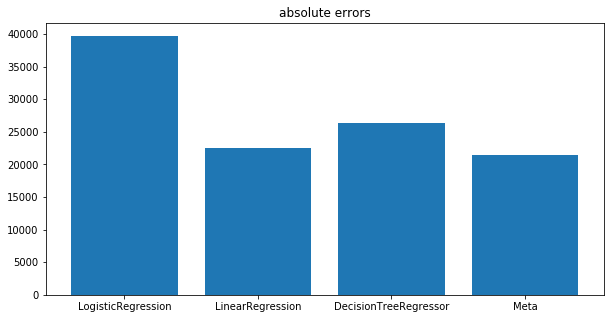

In [2]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import auc, roc_curve, roc_auc_score, mean_absolute_error, mean_squared_error
%matplotlib inline

pd.set_option('display.expand_frame_repr', False)

#RandomForestRegressor
data = pd.read_csv('train.csv')

target = data['SalePrice']
del data['SalePrice']
    
data = pd.get_dummies(data=data)
data = data.replace([np.inf, -np.inf], np.nan)
data=data.fillna(data.median(), inplace=False)
data = data.dropna(axis=1)

X_train, X_test, y_train, y_test = train_test_split(data, target)

model = RandomForestRegressor()
model.fit(X_train,y_train)
prediction = model.predict(X_test)

print('RandomForestRegressor: errors')
print('mean_absolute_error=', mean_absolute_error(y_test, prediction))
print('mean_squared_error=', mean_squared_error(y_test, prediction))
print('sqrt_mean_squared_error=', mean_squared_error(y_test, prediction)**0.5)
print('target.max=', target.max())
print('target.min=', target.min())
print('target.mean=', target.mean())

feature_importances = list(zip(model.feature_importances_, data.columns))
feature_importances = sorted(feature_importances, key=lambda x: -x[0])

features = [x[1] for x in feature_importances][0:16]
print('Features:')
for importance, feature in feature_importances:
    print(feature, importance)
    
data = pd.read_csv('train.csv')
target = data['SalePrice']
del data['SalePrice']
#print(features)
data = pd.DataFrame(data.loc[:, features])

data = pd.get_dummies(data=data)
data = data.fillna(data.median())
data = data.dropna(axis=1)



X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

log_r = LogisticRegression(penalty='l1', C=0.6)
log_r.fit(X_train, y_train)
y_log_r = log_r.predict(X_test)

lin_r = LinearRegression()
lin_r.fit(X_train, y_train)
y_lin_r = lin_r.predict(X_test)

tr_r = DecisionTreeRegressor()
tr_r.fit(X_train, y_train)
y_tr_r = tr_r.predict(X_test)

print('using Regressions, get errors')
print('LogisticRegression absolute error:', mean_absolute_error(y_test, y_log_r))
print('LinearRegression absolute error:', mean_absolute_error(y_test, y_lin_r))
print('DecisionTreeRegressor absolute error:', mean_absolute_error(y_test, y_tr_r))

#Стэкинг мета-признаков
def get_meta_features(clf, X_train, y_train, X_test, stack_cv):
    meta_train = np.zeros_like(y_train, dtype=float)
    meta_test = np.zeros_like(y_test, dtype=float)
    
    for i, (train_ind, test_ind) in enumerate(stack_cv.split(X_train, y_train)):  
        clf.fit(X_train.iloc[train_ind], y_train.iloc[train_ind])
        meta_train[test_ind] = clf.predict(X_train.iloc[test_ind])
        meta_test += clf.predict(X_test)
    return meta_train, meta_test / stack_cv.n_splits

meta_train = []
meta_test = []
col_names = []

stack_cv = StratifiedKFold(n_splits=10, random_state=555)

X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

log_r = LogisticRegression(penalty='l2', C=0.6)
meta_tr, meta_te = get_meta_features(log_r, X_train, y_train, X_test, stack_cv)

meta_train.append(meta_tr)
meta_test.append(meta_te)
col_names.append('log_r')

lin_r = LinearRegression()
meta_tr, meta_te = get_meta_features(lin_r, X_train, y_train, X_test, stack_cv)

meta_train.append(meta_tr)
meta_test.append(meta_te)
col_names.append('lin_r')

tr_r = DecisionTreeRegressor()
meta_tr, meta_te = get_meta_features(tr_r, X_train, y_train, X_test, stack_cv)

meta_train.append(meta_tr)
meta_test.append(meta_te)
col_names.append('tr_r')

X_meta_train = pd.DataFrame(np.stack(meta_train, axis=1), columns=col_names)
X_meta_test = pd.DataFrame(np.stack(meta_test, axis=1), columns=col_names)

#clf_meta = LogisticRegression(penalty='l2', C=1)
#clf_meta = DecisionTreeRegressor()
clf_meta = LinearRegression()

clf_meta.fit(X_meta_train, y_train)

y_pred_meta_test = clf_meta.predict(X_meta_test)

print(X_meta_train)

log_r_err = mean_absolute_error(y_test, y_log_r)
lin_r_err = mean_absolute_error(y_test, y_lin_r)
tr_r_err = mean_absolute_error(y_test, y_tr_r)
meta_err = mean_absolute_error(y_test, y_pred_meta_test)

print('LogisticRegression absolute error:', log_r_err)
print('LinearRegression absolute error:', lin_r_err)
print('DecisionTreeRegressor absolute error:', tr_r_err)
print('meta absolute error:', meta_err)

errors = {
    'LogisticRegression': log_r_err,
    'LinearRegression': lin_r_err,
    'DecisionTreeRegressor': tr_r_err,
    'Meta': meta_err
}

err_names = list(errors.keys())
err_values = list(errors.values())

plt.figure(figsize=(10, 5))
plt.bar(err_names, err_values)
plt.title('absolute errors')
plt.show()



